In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def timeit(func):
    def wrapper(*arg, **kw):
        t1 = time.perf_counter()
        res = func(*arg, **kw)
        t2 = time.perf_counter()
        print("{0} took {1}s".format(func.__name__, (t2 - t1)))
        return res
    return wrapper

arr = np.genfromtxt("xdata.txt")

mu_hat = arr.mean()
mu_hat

2.5384902240000002

log likelihood:
$$l(\lambda | x) = \frac{n}{2}\log(\lambda) - \frac{1}{2} \sum_{i=1}^{n} \log(2\pi x_i^3) - \sum_{i=1}^{n} \frac{\lambda(x_i-\mu)^2}{2\mu^2x_i}$$

$$\frac{dl(\lambda | x)}{d\lambda} = \frac{n}{2\lambda} - \sum_{i=1}^{n} \frac{(x_i-\mu)^2}{2\mu^2x_i}$$

funl took 0.000221800000872463s
funderivativel took 8.209998486563563e-05s


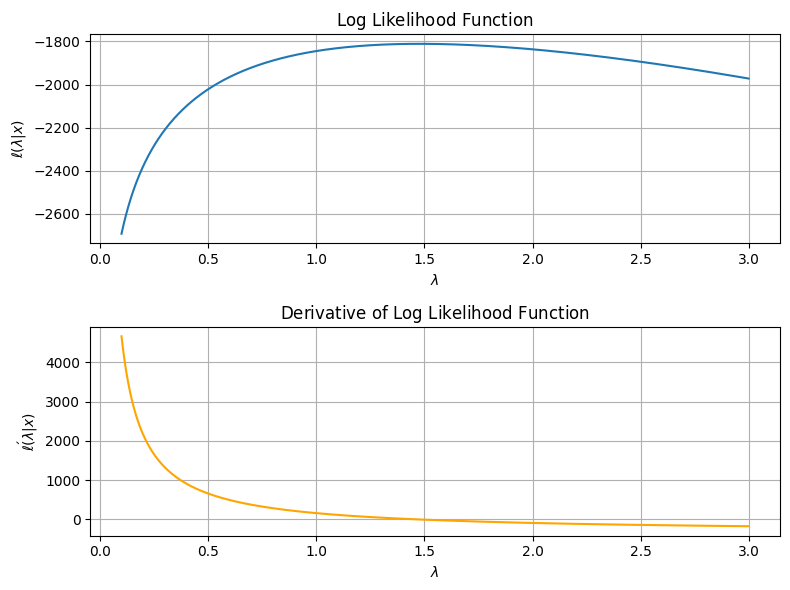

In [2]:
delta = 0.001
lambda_values = np.arange(0.1,3,delta)

@timeit
def funl(lambdas, mu, arr):
    n = len(arr)
    log_likelihoods = n/2 * np.log(lambdas) - 1/2 * np.log(2*np.pi*arr**3).sum() - lambdas * (((arr - mu)**2)/((2*mu**2)*arr)).sum()
    return log_likelihoods

@timeit
def funderivativel(lambdas, mu, arr):
    n = len(arr)
    log_likelihoods_derivatives = (n/(2*lambdas)) - (((arr - mu)**2)/((2*mu**2)*arr)).sum()
    return log_likelihoods_derivatives

log_likelihood = funl(lambda_values, mu_hat, arr)
derivative_log_likelihood = funderivativel(lambda_values, mu_hat, arr)

fig, axes = plt.subplots(2, 1, figsize=(8, 6))

axes[0].plot(lambda_values, log_likelihood, label='Log Likelihood')
axes[0].set_title(r'$\mathrm{Log\ Likelihood\ Function}$')
axes[0].set_xlabel(r'$\lambda$')
axes[0].set_ylabel(r'$\ell(\lambda | x)$')
axes[0].grid(True)

axes[1].plot(lambda_values, derivative_log_likelihood, label='Derivative of Log Likelihood', color='orange')
axes[1].set_title(r'$\mathrm{Derivative\ of\ Log\ Likelihood\ Function}$')
axes[1].set_xlabel(r'$\lambda$')
axes[1].set_ylabel(r'$\ell\'(\lambda | x)$')
axes[1].grid(True)

plt.tight_layout()
#plt.savefig("figures/log_likelihood.pdf", format="pdf")
plt.show()